# Programa Ingenias+ Data Science

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
import sklearn

In [4]:
# Chequeamos nuestra version
sklearn.__version__

'1.6.1'

Ya dijimos previamente que un proyecto de data science tiene varias etapas:

1. Recolección de Datos
2. Exploración y Procesamiento de los datos
3. Modelado
4. Puesta en Producción

En la clase anterior, hicimos el analisis exploratorio de los datos y pudimos observar el tipo de datos que teniamos. Pudimos hacernos preguntas y ver algunos patrones.

Una vez que visualizamos y exploramos el dataset tenemos una idea de como lucen nuestros datos. Es por eso que ahora debemos empezar a preparar nuestros datos para los siguientes pasos según lo que aprendimos de ellos y las preguntas que nos planteamos.

In [5]:
# Leemos nuevamente los datos del blackfriday
blackfriday = pd.read_csv('https://raw.githubusercontent.com/micaelakorol21/datasets/refs/heads/main/train.csv')

In [6]:
blackfriday.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


#### MANEJO DE DATOS FALTANTES 🚨

Primero, vamos a recordar si tenemos datos faltantes.

In [7]:
blackfriday.isna().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,173638


¿Cuanto representa esos valores faltantes?

In [8]:
# Representar los valores faltantes en porcentaje
blackfriday.isna().mean()

,0
User_ID,0.000000
Product_ID,0.000000
Gender,0.000000
Age,0.000000
Occupation,0.000000
City_Category,0.000000
Stay_In_Current_City_Years,0.000000
Marital_Status,0.000000
Product_Category_1,0.000000
Product_Category_2,0.315666


**¿Que debo preguntarme al manejar datos faltantes?**

- ¿Quiero conservar la información?
- ¿Qué tipo de datos tengo en la columna que voy a imputar?
- ¿Por qué puede ser que tengo los valores faltantes?:
    - Valores faltantes al azar
    - Valores faltantes no al azar
- Si es una variable numerica continua, ¿Que distribución tiene?

**¿Como decido que hago con los valores faltantes?**

- Entender que no hay una manera _perfecta_ de manejar los valores faltantes.

- Depende de mis datos

- Observar no solo la cantidad de datos faltantes sino también su patrón.

- Estrategias:  
     - **Eliminar los valores**:
        - Si la recogida de datos no se ha realizado de forma aleatoria introduce sesgo.  
        - En el caso de que haya mucho patrones con datos faltantes, podría reducir considerablemente la cantidad de filas disponibles.
     - **Eliminación de la variable (columna)**:
         - Las variables “descartadas” podrían contener información de vital importancia.      
     - **Imputar los valores**:
        - Sustituir por media o mediana: Solo en variables numericas  
        - Sustituir por valor mas frecuente: Util para variables categoricas
        - Algoritmo de ML: K-NN (k-nearest neighboors)

A) Si optamos por eliminar los datos, puedemos hacerlo usando la siguiente función:
    
`.dropna(self, axis=0, how='any', thresh=None, subset=None, inplace=False)`

- **axis**: {0, 1}, default 0. 0: Filas, 1: Columnas
- **how**: {'any', 'all'}, default 'any'. Any: Si hay un valor faltante elimina la columna o fila. All: Si todos los valores de la fila o columna son faltantes, elimina la fila o columna.
- **subset**: Nombre de filas o columnas donde buscar valores faltantes
- **inplace**: True modifica el DataFrame original

[documentación](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

In [12]:
# Crea una nueva copia del DataFrame blackfriday sin ninguna fila que contenga valores NaN (valores faltantes).
blackfriday_drop = blackfriday.dropna()

In [13]:
blackfriday_drop.shape

(166821, 12)

In [14]:
# Elimina solo las filas en las que todos los valores son NaN (nulos).

blackfriday.dropna(how='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [15]:
# Elimina solo las filas donde la columna 'Gender' tenga valores nulos (NaN).
blackfriday.dropna(subset=['Gender'])

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [16]:
# Elimina todas las filas del DataFrame blackfriday en las que al menos una de las columnas Age o Gender tenga un valor nulo (NaN).
blackfriday.dropna(subset=['Age', 'Gender'])

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


B) Si optamos por imputar los datos, podemos hacerlo usando la siguiente función:
    
`sklearn.impute.SimpleImputer(missing_values=nan, strategy=’mean’, fill_value=None, copy=True, add_indicator=False)`
    
- **missing_values**: Indica como son representados los valores faltantes (np.nan es el estandard)
- **strategy**: `mean`, `median`, `most_frequent`, `constant`.
- **fill_value**: Si uso `constant`, puedo usar `fill_value` para indicar por cuál valor debe ser reemplazado
- **copy**: Si pongo True, crea una copia de X
- **add_indicator**: Agrega un indicador para los valores faltantes.


[documentación](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer)

In [17]:
from sklearn.impute import SimpleImputer

**Variable: `City_Category`**

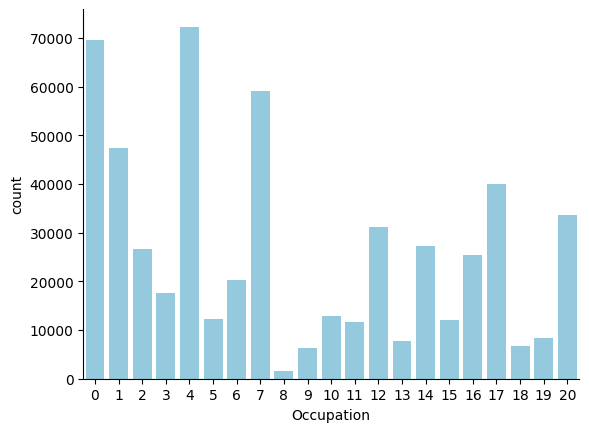

In [19]:
# Crea un gráfico de barras (barplot) con la cantidad de ocurrencias (frecuencia) de cada valor en la columna "Occupation" del DataFrame blackfriday.
sns.countplot(x="Occupation", data=blackfriday, color="skyblue")
# Elimina las líneas del borde superior y derecho del gráfico (para una visualización más limpia).
sns.despine()

In [20]:
blackfriday['Occupation'].value_counts()

,count
Occupation,
4,72308
0,69638
7,59133
1,47426
17,40043
20,33562
12,31179
14,27309
2,26588


In [21]:
# Crea un imputador (una herramienta para rellenar valores faltantes) usando SimpleImputer de scikit-learn.
imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
# Reemplaza cada valor NaN con el valor más frecuente (moda) de esa columna.

In [22]:
# Imputer no hace nada hasta que se aplica .fit_transform() o .transform() a un DataFrame.
blackfriday_imputados = imputer.fit_transform(blackfriday[['Occupation']])

In [23]:
np.shape(blackfriday_imputados)

(550068, 1)

In [24]:
blackfriday_imputados[:10]

array([[10],
       [10],
       [10],
       [10],
       [16],
       [15],
       [ 7],
       [ 7],
       [ 7],
       [20]])

In [25]:
blackfriday["Occupation"] = blackfriday_imputados

In [26]:
blackfriday.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [27]:
blackfriday['Occupation'].value_counts()

,count
Occupation,
4,72308
0,69638
7,59133
1,47426
17,40043
20,33562
12,31179
14,27309
2,26588


**Variable: `Age`**

In [28]:
blackfriday['Age'].describe()

,Age
count,550068
unique,7
top,26-35
freq,219587


In [29]:
imputer_age = SimpleImputer(missing_values=np.nan, strategy="mean")

In [ ]:
#blackfriday['Age'] = imputer_age.fit_transform(blackfriday[['Age']]).ravel()

In [30]:
# Convertir la columna 'Age' de string a entero
# Ver el tipo de dato de una columna específica
print(blackfriday['Age'].dtype)

object


**Variable: `Gender`**

In [35]:
blackfriday['Gender'].value_counts()

,count
Gender,
M,414259
F,135809


In [36]:
imputer_gen = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

In [37]:
blackfriday['Gender'] = imputer_gen.fit_transform(blackfriday[['Gender']]).ravel()

In [38]:
blackfriday['Gender'].value_counts()

,count
Gender,
M,414259
F,135809


**Variable `Purchase`**

In [39]:
blackfriday.dropna(subset=['Purchase'], inplace=True)

**Columnas `Product_Category_2` and `Product_Category_3`**

In [40]:
# Entonces, en resumen, este código elimina las columnas Product_Category_2 y Product_Category_3 del DataFrame blackfriday de forma permanente.
blackfriday.drop(['Product_Category_2', 'Product_Category_3'], axis=1, inplace=True)

In [41]:
blackfriday.isna().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Purchase,0


#### DETECCION DE OUTLIERS

- Manera de detectar outliers:
    - z-score
        - Considera que todo valor que se aleje mucho de la media=0 es un outlier.
        - Depende de la media y el desvio estandard para medir la centralidad y dispersión, los cuales son muy afectados por outliers. Si las variables no tiene una distribución normal, termino removiendo muchos outliers del dataset.
        - No funciona bien en dataset muy pequeños.
    - Rango Intercuartil:
        - Es robusto y no es tan sensible a outliers.

In [42]:
blackfriday.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,int64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category_1,int64
Purchase,int64


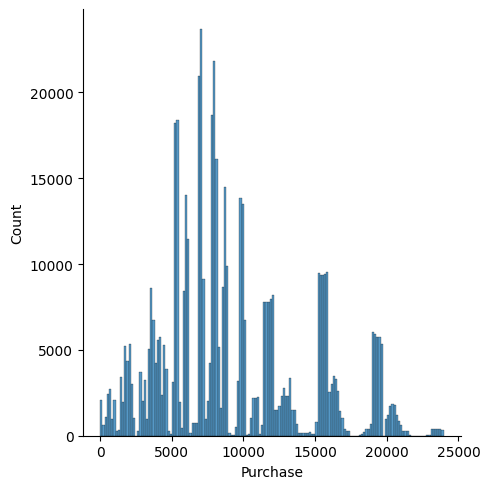

In [43]:
sns.displot(blackfriday['Purchase'])
sns.despine()

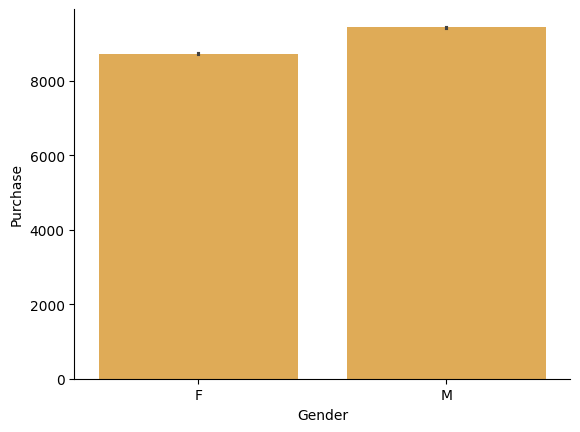

In [44]:
ax = sns.barplot(x='Gender', y='Purchase', data=blackfriday, color='#F5B041')
sns.despine()

In [45]:
# Calcula el puntaje Z de la columna Purchase del DataFrame blackfriday.
z = stats.zscore(np.array(blackfriday['Purchase']))
#  Los puntajes Z extremos (por ejemplo, valores mayores a 3 o menores a -3) podrían indicar valores atípicos.

In [47]:
# Los valores que tienen un puntaje Z mayor que 2.0 o menor que -2.0 serán considerados atípicos
threshold = 2.0

In [48]:
# Tiene como objetivo filtrar el DataFrame blackfriday para mantener solo las filas que no contienen valores atípicos en la columna 'Purchase'
z_index = blackfriday['Purchase'][np.abs(z) < threshold].index

blackfriday_withzscore = blackfriday.loc[z_index]

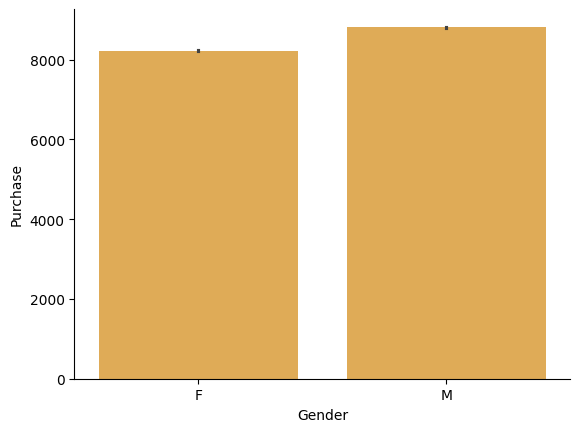

In [49]:
sns.barplot(x='Gender', y='Purchase', data=blackfriday_withzscore, color='#F5B041')
sns.despine()

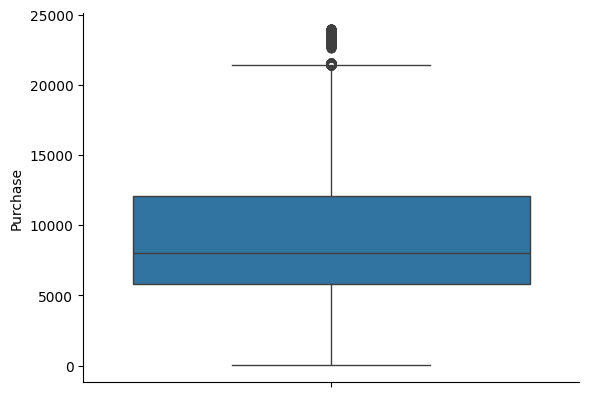

In [50]:
sns.boxplot(blackfriday['Purchase'])
sns.despine()

In [56]:
# Calcula los cuartiles 1 (Q1) y 3 (Q3) de la columna 'Purchase' en el DataFrame blackfriday
q1 = blackfriday['Purchase'].quantile(0.25)
q3 = blackfriday['Purchase'].quantile(0.75)

In [57]:
# Calcula el rango intercuartílico (IQR) y luego define los valores de límites inferior (LB) y límites superior (UB) para identificar valores atípicos en los datos.
iqr = q3 - q1
lb = q1 - (iqr * 1.5)
ub = q3 + (iqr * 1.5)

In [58]:
# Filtra el dataset eliminando los valores atípicos de la columna 'Purchase' que están fuera de los límites definidos por el rango intercuartílico (IQR)
bf = blackfriday[(blackfriday['Purchase'] > lb) & (blackfriday['Purchase'] < ub)]

In [59]:
bf.reset_index(drop=True, inplace=True)

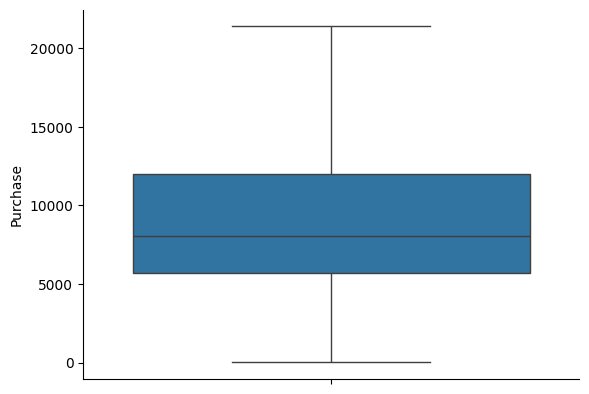

In [60]:
sns.boxplot(bf['Purchase'])
sns.despine()